In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asl-alphabet-test/N/N0007_test.jpg
/kaggle/input/asl-alphabet-test/N/N0005_test.jpg
/kaggle/input/asl-alphabet-test/N/N0029_test.jpg
/kaggle/input/asl-alphabet-test/N/N0010_test.jpg
/kaggle/input/asl-alphabet-test/N/N0015_test.jpg
/kaggle/input/asl-alphabet-test/N/N0004_test.jpg
/kaggle/input/asl-alphabet-test/N/N0013_test.jpg
/kaggle/input/asl-alphabet-test/N/N0014_test.jpg
/kaggle/input/asl-alphabet-test/N/N0012_test.jpg
/kaggle/input/asl-alphabet-test/N/N0003_test.jpg
/kaggle/input/asl-alphabet-test/N/N0020_test.jpg
/kaggle/input/asl-alphabet-test/N/N0001_test.jpg
/kaggle/input/asl-alphabet-test/N/N0006_test.jpg
/kaggle/input/asl-alphabet-test/N/N0016_test.jpg
/kaggle/input/asl-alphabet-test/N/N0026_test.jpg
/kaggle/input/asl-alphabet-test/N/N0027_test.jpg
/kaggle/input/asl-alphabet-test/N/N0024_test.jpg
/kaggle/input/asl-alphabet-test/N/N0009_test.jpg
/kaggle/input/asl-alphabet-test/N/N0025_test.jpg
/kaggle/input/asl-alphabet-test/N/N0030_test.jpg
/kaggle/input/asl-al

In [2]:
from fastai.vision.all import *

In [3]:
path = Path('/kaggle/input/asl-alphabet-test')

In [4]:
path.ls()

(#30) [Path('/kaggle/input/asl-alphabet-test/N'),Path('/kaggle/input/asl-alphabet-test/R'),Path('/kaggle/input/asl-alphabet-test/space'),Path('/kaggle/input/asl-alphabet-test/B'),Path('/kaggle/input/asl-alphabet-test/I'),Path('/kaggle/input/asl-alphabet-test/del'),Path('/kaggle/input/asl-alphabet-test/F'),Path('/kaggle/input/asl-alphabet-test/H'),Path('/kaggle/input/asl-alphabet-test/E'),Path('/kaggle/input/asl-alphabet-test/U')...]

In [5]:
dblock = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(224),
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
)

In [6]:
dls = dblock.dataloaders(path)

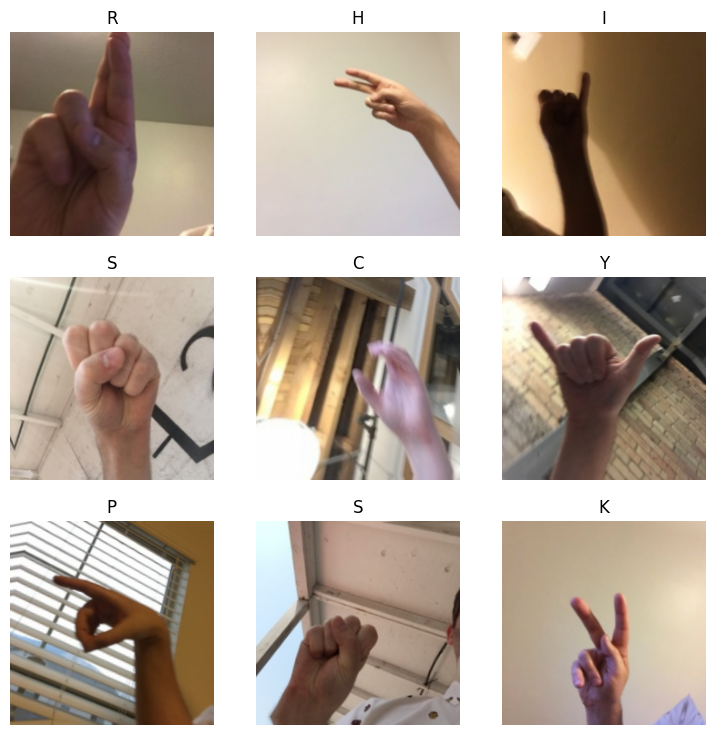

In [7]:
dls.show_batch()

In [8]:
learn = vision_learner(dls, resnet34, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 193MB/s]


In [9]:
learn.fine_tune(4)

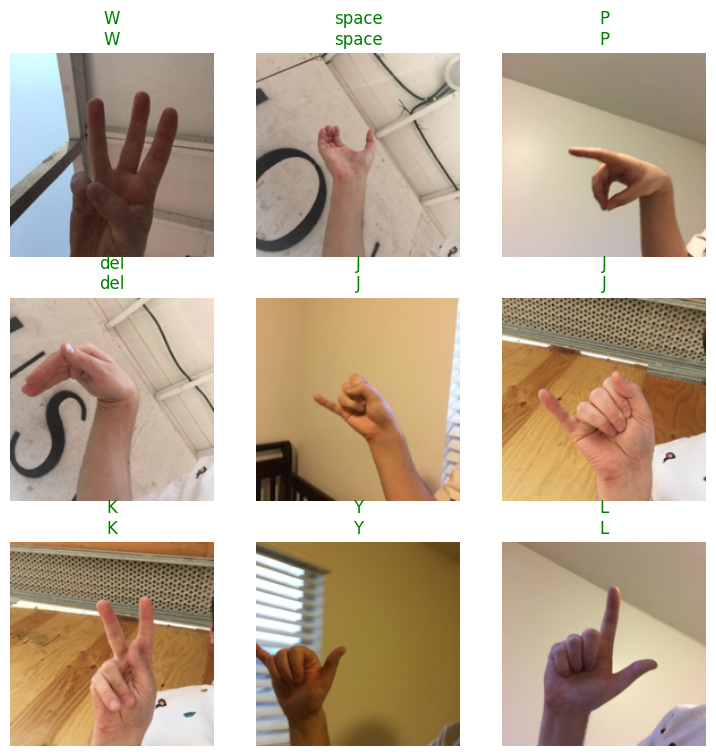

In [10]:
learn.show_results()

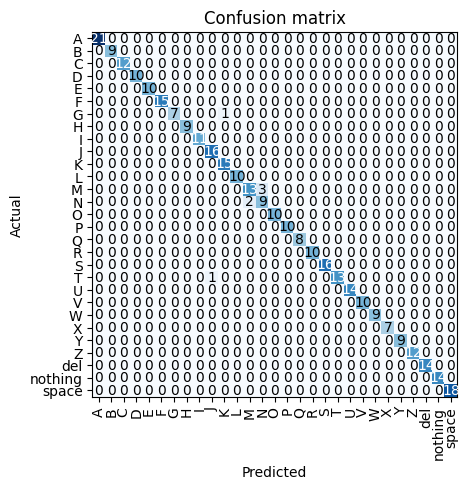

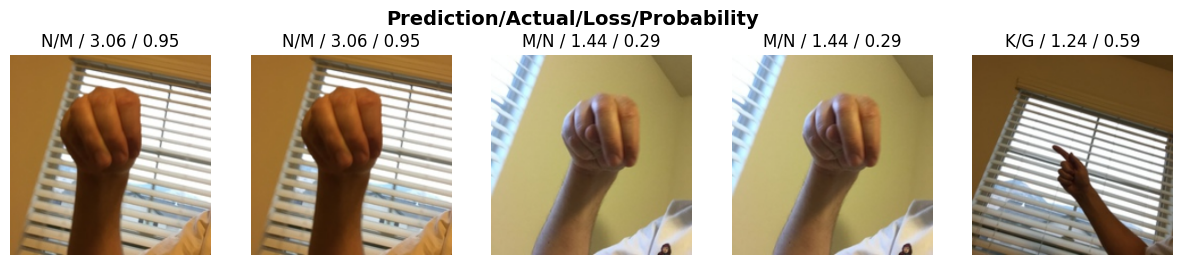

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

In [12]:
from ipywidgets import FileUpload

In [13]:
uploader = FileUpload()

In [14]:
uploader

FileUpload(value={}, description='Upload')

In [15]:
img = PILImage.create(uploader.data[0])

IndexError: list index out of range

In [ ]:
img

In [ ]:
learn.predict(img)

In [ ]:
learn.export()

In [ ]:
 path = Path()
 path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.dls.vocab

In [ ]:
img = PILImage.create(uploader.data[-1])

In [ ]:

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:

def on_click_classify(change):
    img = PILImage.create(uploader.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
btn_run.on_click(on_click_classify)

In [ ]:
from ipywidgets import VBox, Label, Button, Output

In [ ]:
VBox([widgets.Label('Know the Symbol!'), 
      uploader, btn_run, out_pl, lbl_pred])